In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Capítulo 1

* Señal/Signal: representación matemática de una función definida para los valores de tiempo.
* Onda/Wave: es una señal evaluada en secuencias de tiempo. [signal.make_wave(duration, framerate)]
* .ys : es la matriz que contiene los valores de la señal.
* Framerate: cuantos intervalos de tiempo vas a tomar para dividir la señal. (cada cuanto se toman muestras)
* Sample/Muestras: cuántas muestras toma en un intervalo de tiempo. [2*framerate + 1].
* Period: atributo para ondas periodicas.
* Segment: es una parte de una onda, se puede establecer cuántos periodos de la onda se quiere en el segmento.
* Normalize: escala una onda para que solo oscile entre -1 y 1.
* Apodize: atenua el inicio y final de un wave para que no suene el click.
* Spectrum: muestra la frecuencia (x) vs amplitud (y).
    - peaks()[a] : muestra el peak de la posición "a", ordenandolos de mayor a menos amplitud.
    - low_pass(x) : filtro pasa bajo. Elimina todas las amplitudes mayores a "x" frecuencia.



# Capítulo 2

## Señales Periódicas

* Formas de Ondas Periódicas [thinkdsp.waveform(frecuencia)]
    1. Triangular: .TriangleSignal()
    2. Cuadrada: .SquareSignal()
    3. Diente de Sierra: .SawtoothSignal()
    4. Cosenoidal: .CosSignal()
    5. Senoidal: .SinSignal()

* Aliasing: cuando el framerate es muy bajo para las muestras.

* Las señales cuadradas y triangulares solo tienen armónicas impares.
* La señal diente de sierra tiene armónicas pares e impares.
* Las señales cuadradas y diente de sierra disminuyen sus armónicos en proporción de 1/f.
* La señal triangular disminuye en función de 1/f^2.

* Fast Fourier Transform [FFT]
    - Es una función de numpy.
    - Se utiliza la RFFT para sacar el espectro, que es una versión optimizada para entradas reales.
    
* Aunque dos señales de distinta forma de onda, con iguales frecuencias y amplitudes, solo difieren en la phase (phi).



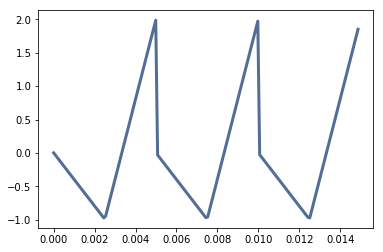

In [2]:
signal_1 = thinkdsp.SawtoothSignal(200)
signal_2 = thinkdsp.TriangleSignal(200)
mix = signal_1 + signal_2

mix.plot()

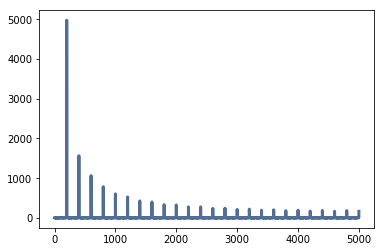

In [3]:
wave = mix.make_wave(duration = 1.0, framerate = 10000)
spectrum = wave.make_spectrum()
spectrum.plot()

[(4975.932441459985, 200.0), (1564.9438443097724, 400.0), (1064.902246269932, 600.0), (786.2238352994602, 800.0), (604.4841531420426, 1000.0), (528.468526941339, 1200.0), (427.7938835675086, 1400.0), (401.12860322945306, 1600.0), (334.3989334882242, 1800.0), (326.157916459474, 2000.0)]


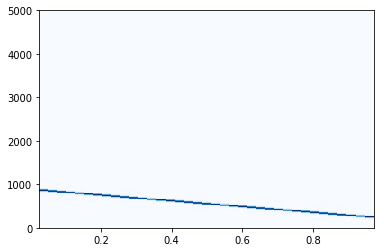

In [13]:
print (spectrum.peaks()[:10])
spectrogram = wave.make_spectrogram(512)
spectrogram.plot()

# Capítulo 3

## Señales No Periódicas

* Formas de Ondas No Periódicas [thinkdsp.waveform()]
    1. Chirp: .Chirp(start, end)
        Aumenta la frecuencia en el tiempo. Se entrega una frecuencia de inicio y otra de termino
    2. ExpoChirp: .ExpoChrip(start, end)
        En el espectrograma se puede apreciar que la frecuencia fundamental del Chirp aumenta de forma lineal, mientras que el ExpoChirp crece exponencialmente.

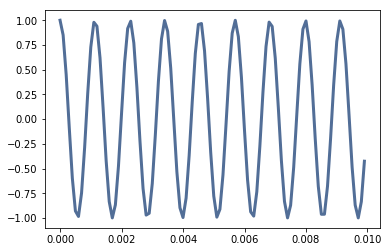

In [7]:
signal = thinkdsp.Chirp(start = 880, end = 220)
wave = signal.make_wave(duration = 1.0, framerate = 10000)
segment1 = wave.segment(start = 0.0, duration = 0.01)
segment1.plot()

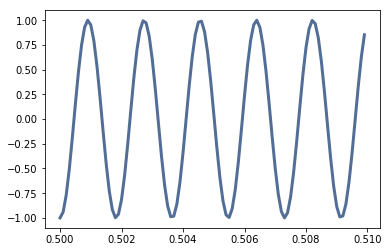

In [8]:
segment2 = wave.segment(start = 0.5, duration = 0.01)
segment2.plot()

In [9]:
wave.make_audio()